In [1]:
#%matplotlib widget

# Visualize case A1 results

Date created: 23/04/2024
Author: @mariacarrizo

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import pygimli as pg
from sklearn.metrics import root_mean_squared_error
import sys
sys.path.insert(1, '../../src')

from Plots import showStitchedModels
from EM1D import EMf_3Lay_HVP

In [8]:
# Import Models

model_true_B1_1 = np.load('models/model_synth_B1_1.npy')
model_true_B1_2 = np.load('models/model_synth_B1_2.npy')
model_true_B1_3 = np.load('models/model_synth_B1_3.npy')
model_true_B1_4 = np.load('models/model_synth_B1_4.npy')

model_true_B1_1[:,2:] = model_true_B1_1[:,2:]*1000
model_true_B1_2[:,2:] = model_true_B1_2[:,2:]*1000
model_true_B1_3[:,2:] = model_true_B1_3[:,2:]*1000
model_true_B1_4[:,2:] = model_true_B1_4[:,2:]*1000

# Results from global search
model_GS_B1_1 = np.load('results/model_GS_B1_1.npy')
model_GS_B1_2 = np.load('results/model_GS_B1_2.npy')
model_GS_B1_3 = np.load('results/model_GS_B1_3.npy')
model_GS_B1_4 = np.load('results/model_GS_B1_4.npy')

model_GS_B1_1[:,2:] = model_GS_B1_1[:,2:]*1000
model_GS_B1_2[:,2:] = model_GS_B1_2[:,2:]*1000
model_GS_B1_3[:,2:] = model_GS_B1_3[:,2:]*1000
model_GS_B1_4[:,2:] = model_GS_B1_4[:,2:]*1000

# Results from optimization
model_Opt_B1_1 = np.load('results/model_Opt_B1_1.npy')
model_Opt_B1_2 = np.load('results/model_Opt_B1_2.npy')
model_Opt_B1_3 = np.load('results/model_Opt_B1_3.npy')
model_Opt_B1_4 = np.load('results/model_Opt_B1_4.npy')

model_Opt_B1_1[:,2:] =  model_Opt_B1_1[:,2:]*1000 
model_Opt_B1_2[:,2:] =  model_Opt_B1_2[:,2:]*1000 
model_Opt_B1_3[:,2:] =  model_Opt_B1_3[:,2:]*1000 
model_Opt_B1_4[:,2:] =  model_Opt_B1_4[:,2:]*1000 

# Results from global search Q
model_GS_Q_B1_1 = np.load('results/model_GS_Q_B1_1.npy')
model_GS_Q_B1_2 = np.load('results/model_GS_Q_B1_2.npy')
model_GS_Q_B1_3 = np.load('results/model_GS_Q_B1_3.npy')
model_GS_Q_B1_4 = np.load('results/model_GS_Q_B1_4.npy')

model_GS_Q_B1_1[:,2:] = model_GS_Q_B1_1[:,2:]*1000
model_GS_Q_B1_2[:,2:] = model_GS_Q_B1_2[:,2:]*1000
model_GS_Q_B1_3[:,2:] = model_GS_Q_B1_3[:,2:]*1000
model_GS_Q_B1_4[:,2:] = model_GS_Q_B1_4[:,2:]*1000

# Results from optimization Q
model_Opt_Q_B1_1 = np.load('results/model_Opt_Q_B1_1.npy')
model_Opt_Q_B1_2 = np.load('results/model_Opt_Q_B1_2.npy')
model_Opt_Q_B1_3 = np.load('results/model_Opt_Q_B1_3.npy')
model_Opt_Q_B1_4 = np.load('results/model_Opt_Q_B1_4.npy')

model_Opt_Q_B1_1[:,2:] = model_Opt_Q_B1_1[:,2:]*1000
model_Opt_Q_B1_2[:,2:] = model_Opt_Q_B1_2[:,2:]*1000
model_Opt_Q_B1_3[:,2:] = model_Opt_Q_B1_3[:,2:]*1000
model_Opt_Q_B1_4[:,2:] = model_Opt_Q_B1_4[:,2:]*1000

# Results from global search IP
model_GS_IP_B1_1 = np.load('results/model_GS_IP_B1_1.npy')
model_GS_IP_B1_2 = np.load('results/model_GS_IP_B1_2.npy')
model_GS_IP_B1_3 = np.load('results/model_GS_IP_B1_3.npy')
model_GS_IP_B1_4 = np.load('results/model_GS_IP_B1_4.npy')

model_GS_IP_B1_1[:,2:] = model_GS_IP_B1_1[:,2:]*1000
model_GS_IP_B1_2[:,2:] = model_GS_IP_B1_2[:,2:]*1000
model_GS_IP_B1_3[:,2:] = model_GS_IP_B1_3[:,2:]*1000
model_GS_IP_B1_4[:,2:] = model_GS_IP_B1_4[:,2:]*1000

# Results from optimization IP
model_Opt_IP_B1_1 = np.load('results/model_Opt_IP_B1_1.npy')
model_Opt_IP_B1_2 = np.load('results/model_Opt_IP_B1_2.npy')
model_Opt_IP_B1_3 = np.load('results/model_Opt_IP_B1_3.npy')
model_Opt_IP_B1_4 = np.load('results/model_Opt_IP_B1_4.npy')

model_Opt_IP_B1_1[:,2:] = model_Opt_IP_B1_1[:,2:]*1000
model_Opt_IP_B1_2[:,2:] = model_Opt_IP_B1_2[:,2:]*1000
model_Opt_IP_B1_3[:,2:] = model_Opt_IP_B1_3[:,2:]*1000
model_Opt_IP_B1_4[:,2:] = model_Opt_IP_B1_4[:,2:]*1000

In [9]:
# Import Data
data_true_B1_1 = np.load('data/data_synth_B1_1.npy')*1000
data_true_B1_2 = np.load('data/data_synth_B1_2.npy')*1000
data_true_B1_3 = np.load('data/data_synth_B1_3.npy')*1000
data_true_B1_4 = np.load('data/data_synth_B1_4.npy')*1000

data_GS_B1_1 = np.load('data/data_GS_B1_1.npy')*1000
data_GS_B1_2 = np.load('data/data_GS_B1_2.npy')*1000
data_GS_B1_3 = np.load('data/data_GS_B1_3.npy')*1000
data_GS_B1_4 = np.load('data/data_GS_B1_4.npy')*1000

data_GS_Q_B1_1 = np.load('data/data_GS_Q_B1_1.npy')*1000
data_GS_Q_B1_2 = np.load('data/data_GS_Q_B1_2.npy')*1000
data_GS_Q_B1_3 = np.load('data/data_GS_Q_B1_3.npy')*1000
data_GS_Q_B1_4 = np.load('data/data_GS_Q_B1_4.npy')*1000

data_GS_IP_B1_1 = np.load('data/data_GS_IP_B1_1.npy')*1000
data_GS_IP_B1_2 = np.load('data/data_GS_IP_B1_2.npy')*1000
data_GS_IP_B1_3 = np.load('data/data_GS_IP_B1_3.npy')*1000
data_GS_IP_B1_4 = np.load('data/data_GS_IP_B1_4.npy')*1000

data_Opt_B1_1 = np.load('data/data_Opt_B1_1.npy')*1000
data_Opt_B1_2 = np.load('data/data_Opt_B1_2.npy')*1000
data_Opt_B1_3 = np.load('data/data_Opt_B1_3.npy')*1000
data_Opt_B1_4 = np.load('data/data_Opt_B1_4.npy')*1000

data_Opt_Q_B1_1 = np.load('data/data_Opt_Q_B1_1.npy')*1000
data_Opt_Q_B1_2 = np.load('data/data_Opt_Q_B1_2.npy')*1000
data_Opt_Q_B1_3 = np.load('data/data_Opt_Q_B1_3.npy')*1000
data_Opt_Q_B1_4 = np.load('data/data_Opt_Q_B1_4.npy')*1000

data_Opt_IP_B1_1 = np.load('data/data_Opt_IP_B1_1.npy')*1000
data_Opt_IP_B1_2 = np.load('data/data_Opt_IP_B1_2.npy')*1000
data_Opt_IP_B1_3 = np.load('data/data_Opt_IP_B1_3.npy')*1000
data_Opt_IP_B1_4 = np.load('data/data_Opt_IP_B1_4.npy')*1000

In [10]:
def grid(model, depthmax=8, ny=101, nlay=3):
    """ Generates a grid from the model to plot a 2D section
    """
    # Arrays for plotting
    npos = np.shape(model)[0] # number of 1D models
   # ny = 101 # size of the grid in y direction
    y = np.linspace(0, depthmax, ny) # y axis [m]
    grid = np.zeros((npos, ny)) # empty grid
    thk = model[:,:nlay-1].copy() # define electrical conductivities
    sig = model[:,nlay-1:].copy()  # define thicknesses
    
    # Fill the grid with the conductivity values
    
    if nlay == 3:
        for i in range(npos):
            y1 = 0
            # First layer
            while y[y1] < thk[i,0]:
                grid[i, y1] = sig[i, 0]
                y1 += 1
                if y1 > ny-1:
                    break
                #y2 = y1
            # Second layer
            while y[y1] < (thk[i,0] + thk[i,1]):
                grid[i, y1] = sig[i, 1]
                y1 += 1
                if y1 > ny-1:
                    break
            # Third layer
            grid[i, y1:] = sig[i, 2]
    
    if nlay == 2:   
        for i in range(npos):
            y1 = 0
            # First layer
            while y[y1] < thk[i,0]:
                grid[i, y1] = sig[i, 0]
                y1 += 1
                if y1 > ny-1:
                    break
            while y[y1] >= thk[i,0]:
                grid[i, y1] = sig[i, 1]
                y1 += 1
                if y1 > ny-1:
                    break
        
    return grid

In [11]:
def plot_Data(data_true, data_est, ax, legen=False, ylab=False, ylabel = 'Q', xlab=False, fs=7):

    ax.semilogy(data_true[:,0], 'b', label='H2 true')
    ax.semilogy(data_true[:,1], '--b', label='H4 true')
    ax.semilogy(data_true[:,2], ':b', label='H8 true')
    ax.semilogy(data_true[:,3], 'k', label='V2 true')
    ax.semilogy(data_true[:,4], '--k', label='V4 true')
    ax.semilogy(data_true[:,5], ':k', label='V8 true')
    ax.semilogy(data_true[:,6], 'r', label='P2 true')
    ax.semilogy(data_true[:,7], '--r', label='P4 true')
    ax.semilogy(data_true[:,8], ':r', label='P8 true')

    ax.semilogy(data_est[:,0], '.b', label='H2 est')
    ax.semilogy(data_est[:,1], 'xb', label='H4 est')
    ax.semilogy(data_est[:,2], '^b', label='H8 est')
    ax.semilogy(data_est[:,3], '.k', label='V2 est')
    ax.semilogy(data_est[:,4], 'xk', label='V4 est')
    ax.semilogy(data_est[:,5], '^k', label='V8 est')
    ax.semilogy(data_est[:,6], '.r', label='P2 est')
    ax.semilogy(data_est[:,7], 'xr', label='P4 est')
    ax.semilogy(data_est[:,8], '^r', label='P8 est')
    
    if legen == True:
        ax.legend(bbox_to_anchor=(1, 1.05), fontsize=9)
        #ax.legend(fontsize=7, loc='upper right')
    
    if ylab == True:
        ax.set_ylabel(ylabel+' [PPT]', fontsize=fs)
    
    if xlab == True:
        ax.set_xlabel('Distance [m]', fontsize=fs)


In [12]:
def Plot_Models(model_true, model_GS, model_Opt, data_true, data_GS, data_Opt, posQ = 4, posIP =2e-1, case=''):

    inputs1 = {
        'cMin':10,
        'cMax':1800,
        'zMax':8,
        'cMap':'Spectral_r',
        'colorBar':False, 
        'orientation':'vertical',
        'label': 'Elec. cond. [mS/m]',
        'fontsize':7, 
        'labelsize':7
    }

    inputs2 = {
        'colorBar':False,
        'cMin':10,
        'cMax':1800,
        'zMax':8,
        'cMap':'Spectral_r',
        'fontsize':7
    }
    
    fs=8
    fs2=10
    fig, ax = plt.subplots(5,2,  sharex=True,  figsize=(7,7), layout='constrained')

    showStitchedModels(model_true, ax = ax[0,0], **inputs1)

    fig.delaxes(ax[0,1])
    p = ax[0,0].get_position().get_points()
    x0, y0 = p[0]
    x1, y1 = p[1]
    ax[0,0].set_position([x0 + (x1)/2, y0+0.06, (x1-x0) , y1-y0])
    ax[0,0].set_title('True model', fontsize=fs2)
    ax[0,0].set_ylabel('Depth [m]', fontsize=fs)
    ax[0,0].tick_params(labelsize=fs)
    ax[0,0].text(-10,0.5, 'Case ' + case)
    
    showStitchedModels(model_GS, ax = ax[1,0], **inputs2)
    ax[1,0].set_ylabel('Depth [m]', fontsize=fs)
    ax[1,0].text(0,-6, 'RMSE $\sigma$: %2.3f' % root_mean_squared_error(model_true[:,1:], model_GS[:,1:]) + ' mS/m', fontsize=fs)
    ax[1,0].text(0,-7, 'RMSE $h$: %2.3f' % root_mean_squared_error(model_true[:,0], model_GS[:,0]) + ' m', fontsize=fs)
    ax[1,0].tick_params(labelsize=fs)
    ax[1,0].set_title('Estimated model - GS [Q+IP]', fontsize=fs2)
    
    showStitchedModels(model_Opt, ax = ax[1,1], **inputs2)
    #ax[1,1].set_ylabel('Depth [m]')
    ax[1,1].text(0,-6, 'RMSE $\sigma$: %2.3f' % root_mean_squared_error(model_true[:,1:], model_Opt[:,1:]) + ' mS/m', fontsize=fs)
    ax[1,1].text(0,-7, 'RMSE $h$: %2.3f' % root_mean_squared_error(model_true[:,0], model_Opt[:,0]) + ' m', fontsize=fs)  
    ax[1,1].tick_params(labelsize=fs)
    ax[1,1].set_title('Estimated model - Opt [Q+IP]', fontsize=fs2)
    
    model_true_grid = grid(model_true)
    model_GS_grid = grid(model_GS)
    model_Opt_grid = grid(model_Opt)
    
    diff_GS = 100*np.abs(model_true_grid - model_GS_grid)/model_true_grid
    diff_Opt = 100*np.abs(model_true_grid - model_Opt_grid)/model_true_grid
    
    ax[2,0].imshow(diff_GS.T, extent=[-1,20, -8,0], norm=colors.LogNorm(vmin=0.1, vmax=100), cmap = 'binary', aspect='auto')
    ax[2,0].set_ylabel('Depth [m]', fontsize=fs)
    ax[2,0].set_title('Relative difference % - GS', fontsize=fs2)
    ax[2,0].tick_params(labelsize=fs)
    
    dc = ax[2,1].imshow(diff_Opt.T, extent=[-1,20, -8,0], norm=colors.LogNorm(vmin=0.1, vmax=100), cmap = 'binary', aspect='auto')
    ax[2,1].set_title('Relative difference % - Opt', fontsize=fs2)
    ax[2,1].tick_params(labelsize=fs)
    #cb = fig.colorbar(dc, ax=ax[2,1], location='right', )#pad=1e-9)
    #cb.set_label('Rel. Difference %', fontsize=fs)

    plot_Data(data_true, data_GS, ax=ax[3,0], ylab=True,)  
    ax[3,0].set_title('Quadrature - GS - RMSE: %2.3f' % root_mean_squared_error(data_true[:,:9], data_GS[:,:9]) + ' ppt', fontsize=fs2)
    ax[3,0].tick_params(labelsize=fs)
    
    plot_Data(data_true, data_Opt, ax=ax[3,1], )
    ax[3,1].set_title('Quadrature - Opt - RMSE: %2.3f' % root_mean_squared_error(data_true[:,:9], data_Opt[:,:9]) + ' ppt', fontsize=fs2)
    ax[3,1].tick_params(labelsize=fs)
    
    plot_Data(data_true[:, 9:], data_GS[:, 9:], ax=ax[4,0], ylab=True, ylabel='IP')
    ax[4,0].set_xlabel('Distance [m]', fontsize=fs)
    ax[4,0].set_title('In Phase - GS - RMSE: %2.3f' % root_mean_squared_error(data_true[:,9:], data_GS[:,9:]) + ' ppt', fontsize=fs2)
    ax[4,0].tick_params(labelsize=fs)
 
    plot_Data(data_true[:, 9:], data_Opt[:, 9:], ax=ax[4,1], )
    ax[4,1].set_xlabel('Distance [m]', fontsize=fs)
    ax[4,1].set_title('In Phase - Opt - RMSE: %2.3f' % root_mean_squared_error(data_true[:,9:], data_Opt[:,9:]) + ' ppt', fontsize=fs2)
    ax[4,1].tick_params(labelsize=fs)
    

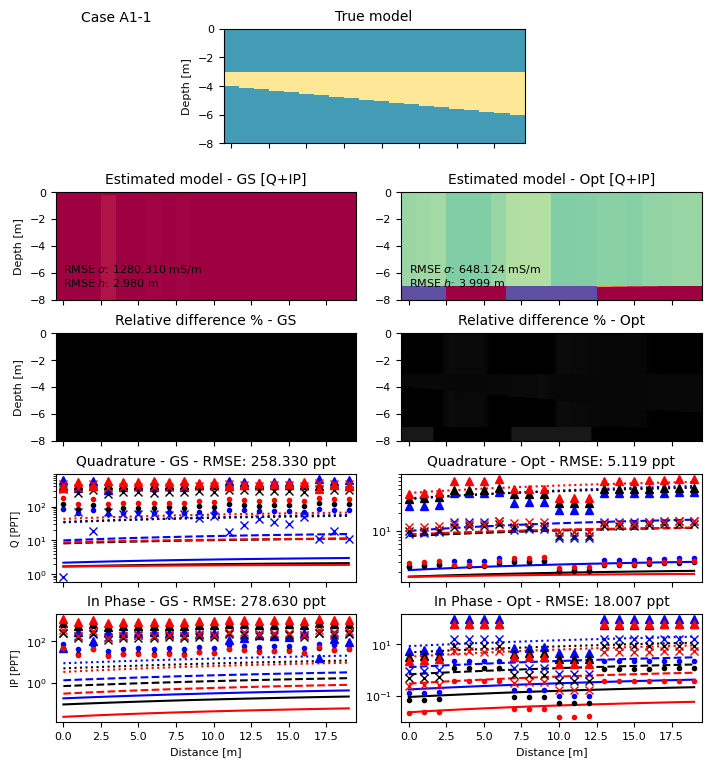

In [13]:
Plot_Models(model_true_B1_1, model_GS_B1_1, model_Opt_B1_1, data_true_B1_1, data_GS_B1_1, data_Opt_B1_1, posQ=6, case='A1-1')
#plt.savefig('figures/F1_GSvsOpt.png', bbox_inches='tight')


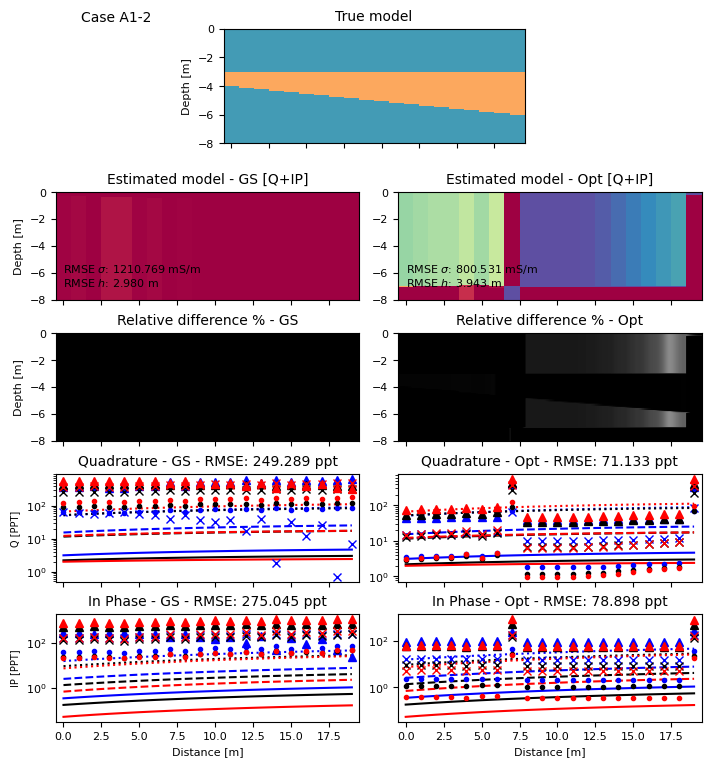

In [14]:
Plot_Models(model_true_B1_2, model_GS_B1_2, model_Opt_B1_2, data_true_B1_2, data_GS_B1_2, data_Opt_B1_2, posQ = 10, posIP= 5e-1, case='A1-2')
#plt.savefig('figures/F2_GSvsOpt.png', bbox_inches='tight')

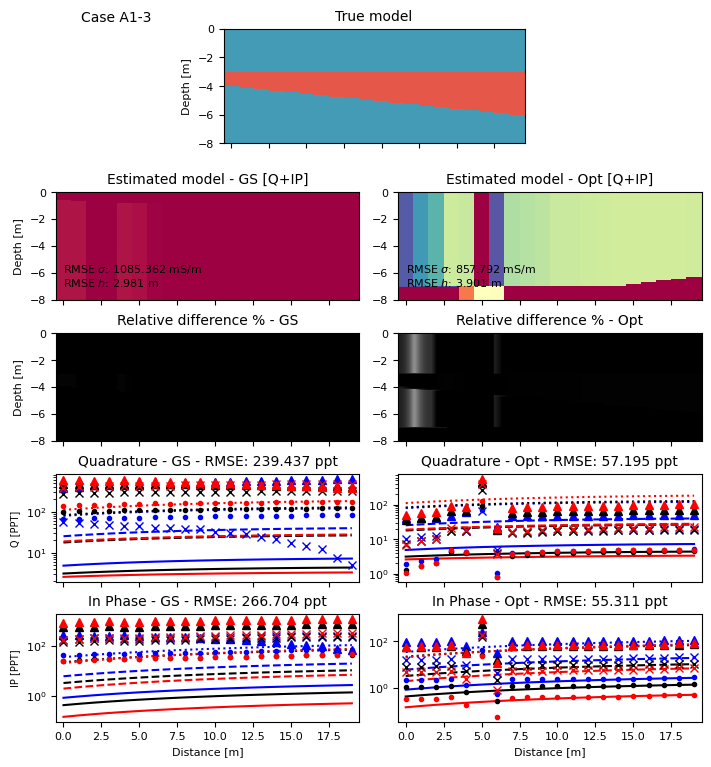

In [15]:
Plot_Models(model_true_B1_3, model_GS_B1_3, model_Opt_B1_3, data_true_B1_3, data_GS_B1_3, data_Opt_B1_3, posQ = 11, posIP= 4e-1, case='A1-3')
#plt.savefig('figures/F3_GSvsOpt.png', bbox_inches='tight')

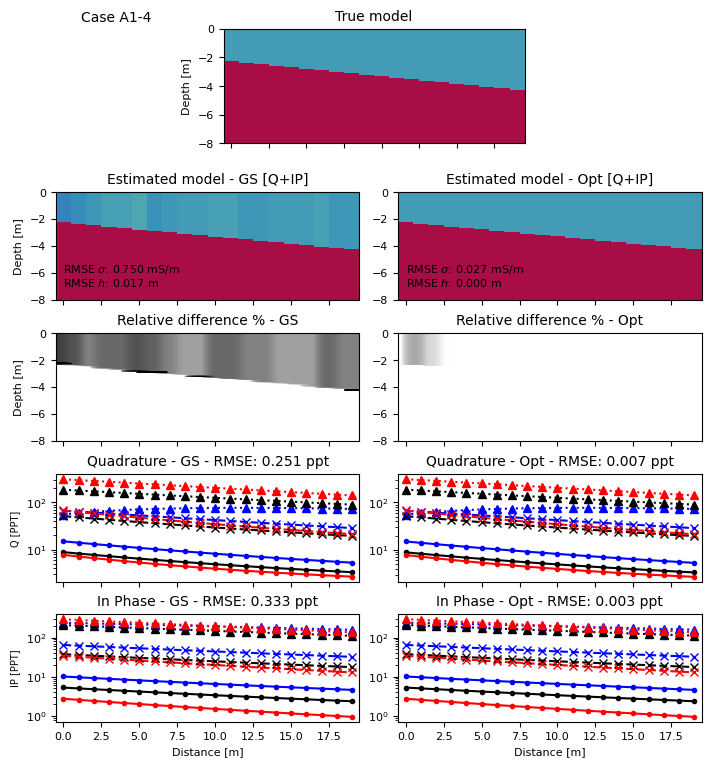

In [11]:
Plot_Models(model_true_A1_4, model_GS_A1_4, model_Opt_A1_4, data_true_A1_4, data_GS_A1_4, data_Opt_A1_4, posQ = 3, posIP= 9e-1, case='A1-4')
plt.savefig('figures/F4_GSvsOpt.png', bbox_inches='tight')

In [28]:
def Plot_Models_compare(model_true, model_GS, model_Opt, data_true, data_GS, data_Opt, data_type = '', pos = 4, case='' ):

    inputs1 = {
        'colorBar':False,
        'cMin':10,
        'cMax':1800,
        'zMax':8,
        'cMap':'Spectral_r',
        #'colorBar':True, 
        'orientation':'horizontal',
        'label': 'Elec. cond. [mS/m]',
        'labelsize':7
    }

    inputs2 = {
        'colorBar':False,
        'cMin':10,
        'cMax':1800,
        'zMax':8,
        'cMap':'Spectral_r',
    }
    fs=8
    fs2=10
    fig, ax = plt.subplots(3,2,  sharex=True,)

    showStitchedModels(model_GS, ax = ax[0,0], **inputs2)
    ax[0,0].set_ylabel('Depth [m]', fontsize=fs)
    ax[0,0].text(0,-6, 'RMSE $\sigma$: %2.3f' % root_mean_squared_error(model_true[:,1:], model_GS[:,1:]) + ' mS/m', fontsize=fs)
    ax[0,0].text(0,-7, 'RMSE $h$: %2.3f' % root_mean_squared_error(model_true[:,0], model_GS[:,0]) + ' m', fontsize=fs)
    ax[0,0].tick_params(labelsize=fs)
    ax[0,0].set_title('Estimated model GS', fontsize=fs2)
    ax[0,0].text(-4,0.7, 'Case ' + case)
    
    model_true_grid = grid(model_true)
    model_GS_grid = grid(model_GS)
    model_Opt_grid = grid(model_Opt)
    
    diff_GS = 100*np.abs(model_true_grid - model_GS_grid)/model_true_grid
    diff_Opt = 100*np.abs(model_true_grid - model_Opt_grid)/model_true_grid
    
    ax[1,0].imshow(diff_GS.T, extent=[-1,20, -8,0], norm=colors.LogNorm(vmin=1, vmax=100), cmap = 'binary', aspect='auto')
    ax[1,0].set_ylabel('Depth [m]', fontsize=fs)
    ax[1,0].set_title('Relative difference % - GS', fontsize=fs2)
    ax[1,0].tick_params(labelsize=fs)
    
    dc = ax[1,1].imshow(diff_Opt.T, extent=[-1,20, -8,0], norm=colors.LogNorm(vmin=0.1, vmax=100), cmap = 'binary', aspect='auto')
    ax[1,1].set_title('Relative difference % - Opt', fontsize=fs2)
    ax[1,1].tick_params(labelsize=fs)
   # cb = fig.colorbar(dc, ax=ax[1,1], location='right', )#pad=1e-9)
   # cb.set_label('Rel. Difference %', fontsize=fs)
   # cb.ax.tick_params(labelsize=fs)

    if data_type == 'Quadrature':
        yl = 'Q'
    else:
        yl = 'IP'

    plot_Data(data_true, data_GS, ax=ax[2,0], ylab=True, ylabel=yl)
    ax[2,0].set_title(data_type + ' - GS - RMSE: %2.3f' % root_mean_squared_error(data_true, data_GS) + ' ppt', fontsize=fs2)
    ax[2,0].set_xlabel('Distance [m]', fontsize=fs)
    ax[2,0].tick_params(labelsize=fs)
    
    showStitchedModels(model_Opt, ax = ax[0,1], **inputs1)
    ax[0,1].text(0,-6, 'RMSE $\sigma$: %2.3f' % root_mean_squared_error(model_true[:,1:], model_Opt[:,1:]) + ' mS/m', fontsize=fs)
    ax[0,1].text(0,-7, 'RMSE $h$: %2.3f' % root_mean_squared_error(model_true[:,0], model_Opt[:,0]) + ' m', fontsize=fs)  
    ax[0,1].tick_params(labelsize=fs)
    ax[0,1].set_title('Estimated model Opt', fontsize=fs2)
    
    plot_Data(data_true, data_Opt, ax=ax[2,1],)
    ax[2,1].set_title(data_type +' - Opt - RMSE: %2.3f' % root_mean_squared_error(data_true, data_Opt) + ' ppt', fontsize=fs2)
    ax[2,1].set_xlabel('Distance [m]', fontsize=fs)
    ax[2,1].tick_params(labelsize=fs)
    
    plt.tight_layout()


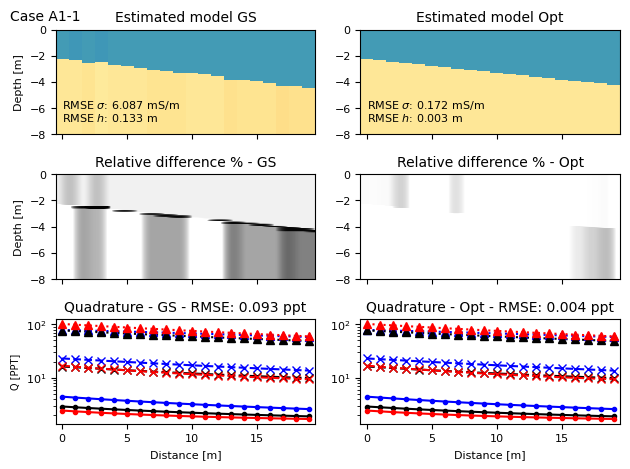

In [13]:
Plot_Models_compare(model_true_A1_1, model_GS_Q_A1_1, model_Opt_Q_A1_1, data_true_A1_1[:,:9], data_GS_Q_A1_1, data_Opt_Q_A1_1, data_type='Quadrature', pos=5, case='A1-1')
plt.savefig('figures/F1_Q.png', bbox_inches='tight')

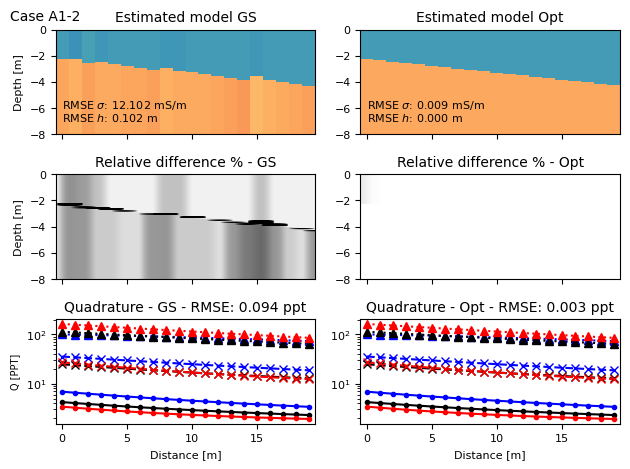

In [14]:
Plot_Models_compare(model_true_A1_2, model_GS_Q_A1_2, model_Opt_Q_A1_2, data_true_A1_2[:,:9], data_GS_Q_A1_2, data_Opt_Q_A1_2, data_type='Quadrature',
                   pos = 8, case='A1-2')
plt.savefig('figures/F2_Q.png', bbox_inches='tight')

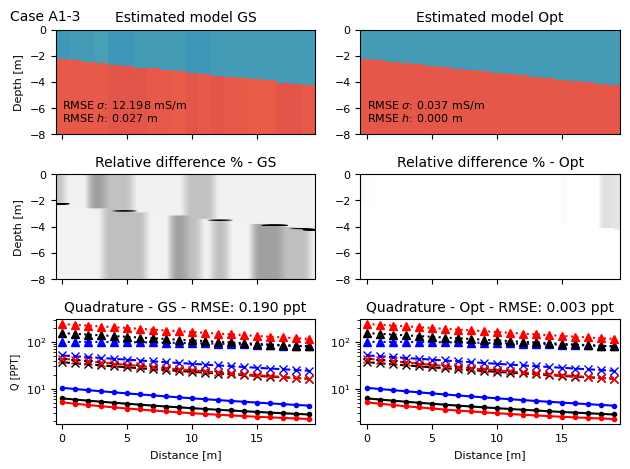

In [15]:
Plot_Models_compare(model_true_A1_3, model_GS_Q_A1_3, model_Opt_Q_A1_3, data_true_A1_3[:,:9], data_GS_Q_A1_3, data_Opt_Q_A1_3, data_type='Quadrature',
                   pos = 11, case='A1-3')
plt.savefig('figures/F3_Q.png', bbox_inches='tight')

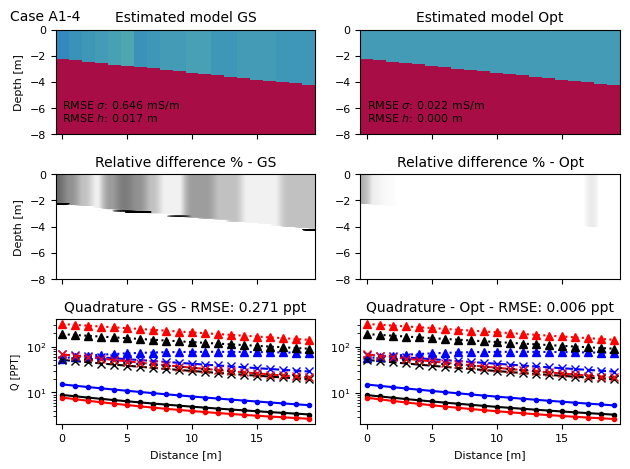

In [16]:
Plot_Models_compare(model_true_A1_4, model_GS_Q_A1_4, model_Opt_Q_A1_4, data_true_A1_4[:,:9], data_GS_Q_A1_4, data_Opt_Q_A1_4, data_type='Quadrature',
                   pos = 3, case='A1-4')
plt.savefig('figures/F4_Q.png', bbox_inches='tight')

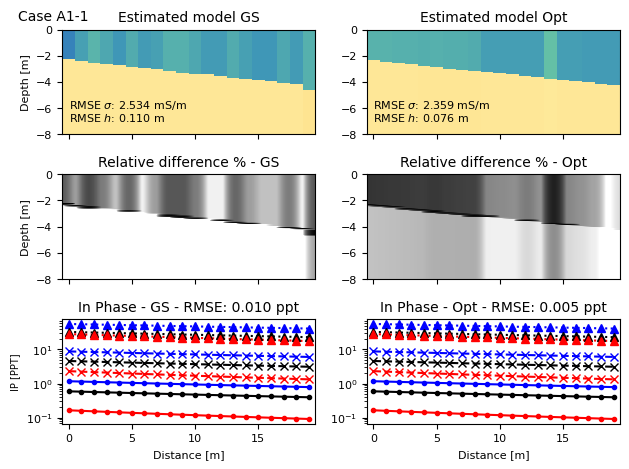

In [29]:
Plot_Models_compare(model_true_A1_1, model_GS_IP_A1_1, model_Opt_IP_A1_1, data_true_A1_1[:,9:], data_GS_IP_A1_1, data_Opt_IP_A1_1, 
                    data_type='In Phase', pos=2e-1, case='A1-1')
plt.savefig('figures/F1_IP.png', bbox_inches='tight')

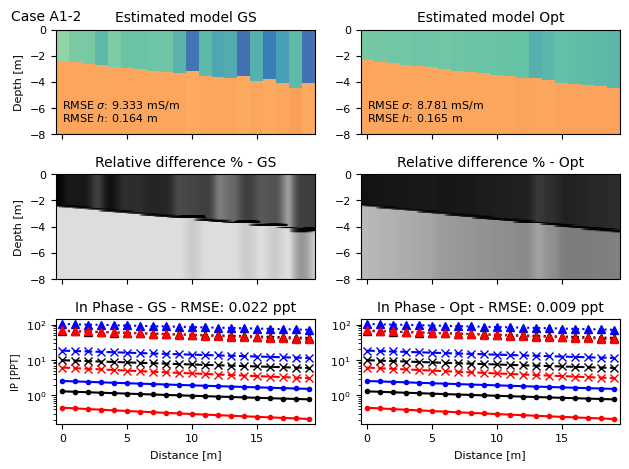

In [30]:
Plot_Models_compare(model_true_A1_2, model_GS_IP_A1_2, model_Opt_IP_A1_2, data_true_A1_2[:,9:], data_GS_IP_A1_2, data_Opt_IP_A1_2, data_type='In Phase',
                   pos=2e-1, case='A1-2')
plt.savefig('figures/F2_IP.png', bbox_inches='tight')

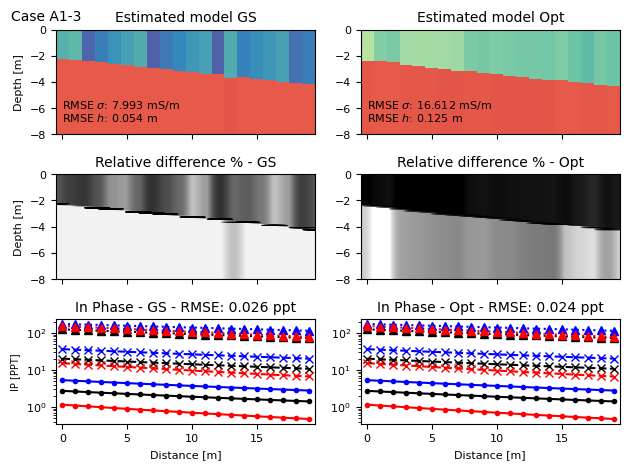

In [31]:
Plot_Models_compare(model_true_A1_3, model_GS_IP_A1_3, model_Opt_IP_A1_3, data_true_A1_3[:,9:], data_GS_IP_A1_3, data_Opt_IP_A1_3, data_type='In Phase',
                   pos=4e-1, case='A1-3')
plt.savefig('figures/F3_IP.png', bbox_inches='tight')

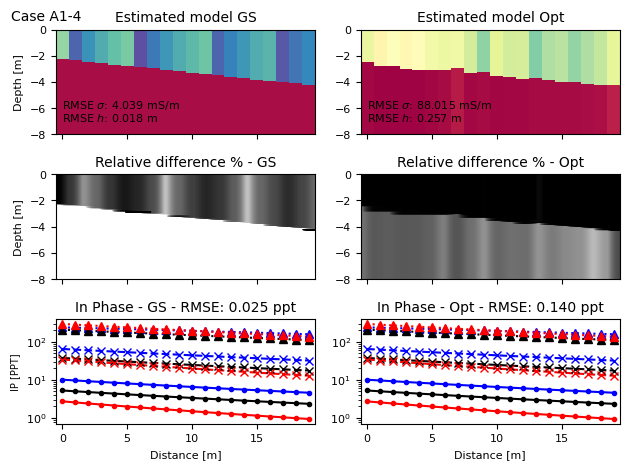

In [32]:
Plot_Models_compare(model_true_A1_4, model_GS_IP_A1_4, model_Opt_IP_A1_4, data_true_A1_4[:,9:], data_GS_IP_A1_4, data_Opt_IP_A1_4, data_type='In Phase',
                   pos=7e-1, case='A1-4')
plt.savefig('figures/F4_IP.png', bbox_inches='tight')

## Noise results

In [33]:
# Load results

model_GS_n2_A1_1 = np.load('results/model_GS_n2_A1_1.npy')
model_GS_n2_A1_2 = np.load('results/model_GS_n2_A1_2.npy')
model_GS_n2_A1_3 = np.load('results/model_GS_n2_A1_3.npy')
model_GS_n2_A1_4 = np.load('results/model_GS_n2_A1_4.npy')

model_GS_n2_A1_1[:,1:] = model_GS_n2_A1_1[:,1:]*1000
model_GS_n2_A1_2[:,1:] = model_GS_n2_A1_2[:,1:]*1000
model_GS_n2_A1_3[:,1:] = model_GS_n2_A1_3[:,1:]*1000
model_GS_n2_A1_4[:,1:] = model_GS_n2_A1_4[:,1:]*1000

model_GS_n5_A1_1 = np.load('results/model_GS_n5_A1_1.npy')
model_GS_n5_A1_2 = np.load('results/model_GS_n5_A1_2.npy')
model_GS_n5_A1_3 = np.load('results/model_GS_n5_A1_3.npy')
model_GS_n5_A1_4 = np.load('results/model_GS_n5_A1_4.npy')

model_GS_n5_A1_1[:,1:] = model_GS_n5_A1_1[:,1:]*1000
model_GS_n5_A1_2[:,1:] = model_GS_n5_A1_2[:,1:]*1000
model_GS_n5_A1_3[:,1:] = model_GS_n5_A1_3[:,1:]*1000
model_GS_n5_A1_4[:,1:] = model_GS_n5_A1_4[:,1:]*1000

model_GS_n10_A1_1 = np.load('results/model_GS_n10_A1_1.npy')
model_GS_n10_A1_2 = np.load('results/model_GS_n10_A1_2.npy')
model_GS_n10_A1_3 = np.load('results/model_GS_n10_A1_3.npy')
model_GS_n10_A1_4 = np.load('results/model_GS_n10_A1_4.npy')

model_GS_n10_A1_1[:,1:] = model_GS_n10_A1_1[:,1:]*1000
model_GS_n10_A1_2[:,1:] = model_GS_n10_A1_2[:,1:]*1000
model_GS_n10_A1_3[:,1:] = model_GS_n10_A1_3[:,1:]*1000
model_GS_n10_A1_4[:,1:] = model_GS_n10_A1_4[:,1:]*1000

model_Opt_n2_A1_1 = np.load('results/model_n2_Opt_A1_1.npy')
model_Opt_n2_A1_2 = np.load('results/model_n2_Opt_A1_2.npy')
model_Opt_n2_A1_3 = np.load('results/model_n2_Opt_A1_3.npy')
model_Opt_n2_A1_4 = np.load('results/model_n2_Opt_A1_4.npy')

model_Opt_n2_A1_1[:,1:] = model_Opt_n2_A1_1[:,1:]*1000
model_Opt_n2_A1_2[:,1:] = model_Opt_n2_A1_2[:,1:]*1000
model_Opt_n2_A1_3[:,1:] = model_Opt_n2_A1_3[:,1:]*1000
model_Opt_n2_A1_4[:,1:] = model_Opt_n2_A1_4[:,1:]*1000

model_Opt_n5_A1_1 = np.load('results/model_n5_Opt_A1_1.npy')
model_Opt_n5_A1_2 = np.load('results/model_n5_Opt_A1_2.npy')
model_Opt_n5_A1_3 = np.load('results/model_n5_Opt_A1_3.npy')
model_Opt_n5_A1_4 = np.load('results/model_n5_Opt_A1_4.npy')

model_Opt_n5_A1_1[:,1:] = model_Opt_n5_A1_1[:,1:]*1000
model_Opt_n5_A1_2[:,1:] = model_Opt_n5_A1_2[:,1:]*1000
model_Opt_n5_A1_3[:,1:] = model_Opt_n5_A1_3[:,1:]*1000
model_Opt_n5_A1_4[:,1:] = model_Opt_n5_A1_4[:,1:]*1000

model_Opt_n10_A1_1 = np.load('results/model_n10_Opt_A1_1.npy')
model_Opt_n10_A1_2 = np.load('results/model_n10_Opt_A1_2.npy')
model_Opt_n10_A1_3 = np.load('results/model_n10_Opt_A1_3.npy')
model_Opt_n10_A1_4 = np.load('results/model_n10_Opt_A1_4.npy')

model_Opt_n10_A1_1[:,1:] = model_Opt_n10_A1_1[:,1:]*1000
model_Opt_n10_A1_2[:,1:] = model_Opt_n10_A1_2[:,1:]*1000
model_Opt_n10_A1_3[:,1:] = model_Opt_n10_A1_3[:,1:]*1000
model_Opt_n10_A1_4[:,1:] = model_Opt_n10_A1_4[:,1:]*1000

In [34]:
# Load data

data_true_n2_A1_1 = np.load('data/data_n2_A1_1.npy')*1000
data_true_n2_A1_2 = np.load('data/data_n2_A1_2.npy')*1000
data_true_n2_A1_3 = np.load('data/data_n2_A1_3.npy')*1000
data_true_n2_A1_4 = np.load('data/data_n2_A1_4.npy')*1000

data_true_n5_A1_1 = np.load('data/data_n5_A1_1.npy')*1000
data_true_n5_A1_2 = np.load('data/data_n5_A1_2.npy')*1000
data_true_n5_A1_3 = np.load('data/data_n5_A1_3.npy')*1000
data_true_n5_A1_4 = np.load('data/data_n5_A1_4.npy')*1000

data_true_n10_A1_1 = np.load('data/data_n10_A1_1.npy')*1000
data_true_n10_A1_2 = np.load('data/data_n10_A1_2.npy')*1000
data_true_n10_A1_3 = np.load('data/data_n10_A1_3.npy')*1000
data_true_n10_A1_4 = np.load('data/data_n10_A1_4.npy')*1000

data_GS_n2_A1_1 = np.load('data/data_GS_n2_A1_1.npy')*1000
data_GS_n2_A1_2 = np.load('data/data_GS_n2_A1_2.npy')*1000
data_GS_n2_A1_3 = np.load('data/data_GS_n2_A1_3.npy')*1000
data_GS_n2_A1_4 = np.load('data/data_GS_n2_A1_4.npy')*1000

data_GS_n5_A1_1 = np.load('data/data_GS_n5_A1_1.npy')*1000
data_GS_n5_A1_2 = np.load('data/data_GS_n5_A1_2.npy')*1000
data_GS_n5_A1_3 = np.load('data/data_GS_n5_A1_3.npy')*1000
data_GS_n5_A1_4 = np.load('data/data_GS_n5_A1_4.npy')*1000

data_GS_n10_A1_1 = np.load('data/data_GS_n10_A1_1.npy')*1000
data_GS_n10_A1_2 = np.load('data/data_GS_n10_A1_2.npy')*1000
data_GS_n10_A1_3 = np.load('data/data_GS_n10_A1_3.npy')*1000
data_GS_n10_A1_4 = np.load('data/data_GS_n10_A1_4.npy')*1000

data_Opt_n2_A1_1 = np.load('data/data_Opt_n2_A1_1.npy')*1000
data_Opt_n2_A1_2 = np.load('data/data_Opt_n2_A1_2.npy')*1000
data_Opt_n2_A1_3 = np.load('data/data_Opt_n2_A1_3.npy')*1000
data_Opt_n2_A1_4 = np.load('data/data_Opt_n2_A1_4.npy')*1000

data_Opt_n5_A1_1 = np.load('data/data_Opt_n5_A1_1.npy')*1000
data_Opt_n5_A1_2 = np.load('data/data_Opt_n5_A1_2.npy')*1000
data_Opt_n5_A1_3 = np.load('data/data_Opt_n5_A1_3.npy')*1000
data_Opt_n5_A1_4 = np.load('data/data_Opt_n5_A1_4.npy')*1000

data_Opt_n10_A1_1 = np.load('data/data_Opt_n10_A1_1.npy')*1000
data_Opt_n10_A1_2 = np.load('data/data_Opt_n10_A1_2.npy')*1000
data_Opt_n10_A1_3 = np.load('data/data_Opt_n10_A1_3.npy')*1000
data_Opt_n10_A1_4 = np.load('data/data_Opt_n10_A1_4.npy')*1000

In [35]:
def Plot_Noise(model_true, model_GS_n2, model_GS_n5, model_GS_n10, model_Opt_n2, model_Opt_n5, model_Opt_n10,
              data_true, data_GS_n2, data_GS_n5, data_GS_n10, data_Opt_n2, data_Opt_n5, data_Opt_n10):
    inputs1 = {
        'colorBar':False,
        'cMin':10,
        'cMax':1800,
        'zMax':8,
        'cMap':'Spectral_r',
        #'colorBar':True, 
        'orientation':'horizontal',
        'label': 'Elec. cond. [mS/m]'
    }

    inputs2 = {
        #'colorBar':False,
        'cMin':10,
        'cMax':1800,
        'zMax':8,
        'cMap':'Spectral_r',
        'colorBar':True, 
        'orientation':'vertical',
        'label': 'Elec. cond. [mS/m]'
    }

    fs=8
    fs2=10
    fig, ax = plt.subplots(8,3, sharex=True, figsize = (9,12))

    showStitchedModels(model_GS_n2, ax=ax[0,0], **inputs1)
    ax[0,0].text(0,-6, 'RMSE $\sigma$: %2.2f' % root_mean_squared_error(model_true[:,1:], model_GS_n2[:,1:]) + ' mS/m', fontsize = fs)
    ax[0,0].text(0,-7, 'RMSE $h$: %2.2f' % root_mean_squared_error(model_true[:,0], model_GS_n2[:,0]) + ' m', fontsize = fs)
    ax[0,0].set_title('Estimated model GS - Noise 2.5%', fontsize=fs2)
    ax[0,0].set_ylabel('Depth [m]', fontsize=fs)
    ax[0,0].tick_params(labelsize=fs)
    
    showStitchedModels(model_GS_n5, ax=ax[0,1], **inputs1)
    ax[0,1].text(0,-6, 'RMSE $\sigma$: %2.2f' % root_mean_squared_error(model_true[:,1:], model_GS_n5[:,1:]) + ' mS/m', fontsize = fs)
    ax[0,1].text(0,-7, 'RMSE $h$: %2.2f' % root_mean_squared_error(model_true[:,0], model_GS_n5[:,0]) + ' m', fontsize = fs)
    ax[0,1].set_title('Estimated model GS - Noise 5%', fontsize=fs2)
    ax[0,1].tick_params(labelsize=fs)
    
    showStitchedModels(model_GS_n10, ax=ax[0,2], **inputs1)
    ax[0,2].text(0,-6, 'RMSE $\sigma$: %2.2f' % root_mean_squared_error(model_true[:,1:], model_GS_n10[:,1:]) + ' mS/m', fontsize = fs)
    ax[0,2].text(0,-7, 'RMSE $h$: %2.2f' % root_mean_squared_error(model_true[:,0], model_GS_n10[:,0]) + ' m', fontsize = fs)
    ax[0,2].set_title('Estimated model GS - Noise 10%', fontsize=fs2)
    ax[0,2].tick_params(labelsize=fs)
    
    # Rel diff  
    model_true_grid = grid(model_true)
    model_GS_n2_grid = grid(model_GS_n2)
    model_GS_n5_grid = grid(model_GS_n5)
    model_GS_n10_grid = grid(model_GS_n10)
    model_Opt_n2_grid = grid(model_Opt_n2)
    model_Opt_n5_grid = grid(model_Opt_n5)
    model_Opt_n10_grid = grid(model_Opt_n10)
    
    diff_GS_n2 = 100*np.abs(model_true_grid - model_GS_n2_grid)/model_true_grid
    diff_GS_n5 = 100*np.abs(model_true_grid - model_GS_n5_grid)/model_true_grid
    diff_GS_n10 = 100*np.abs(model_true_grid - model_GS_n10_grid)/model_true_grid
    
    diff_Opt_n2 = 100*np.abs(model_true_grid - model_Opt_n2_grid)/model_true_grid
    diff_Opt_n5 = 100*np.abs(model_true_grid - model_Opt_n5_grid)/model_true_grid
    diff_Opt_n10 = 100*np.abs(model_true_grid - model_Opt_n10_grid)/model_true_grid
    
    ax[1,0].imshow(diff_GS_n2.T, extent=[-1,20, -8,0], norm=colors.LogNorm(vmin=1, vmax=100), cmap = 'binary', aspect='auto')
    ax[1,0].set_ylabel('Rel diff %', fontsize=fs)
    ax[1,0].tick_params(labelsize=fs)
    ax[1,0].set_title('Rel. difference % - GS', fontsize=fs2)
    ax[1,1].imshow(diff_GS_n5.T, extent=[-1,20, -8,0], norm=colors.LogNorm(vmin=1, vmax=100), cmap = 'binary', aspect='auto')
    ax[1,1].tick_params(labelsize=fs)
    ax[1,1].set_title('Rel. difference % - GS', fontsize=fs2)
    ax[1,2].imshow(diff_GS_n10.T, extent=[-1,20, -8,0], norm=colors.LogNorm(vmin=1, vmax=100), cmap = 'binary', aspect='auto')
    ax[1,2].tick_params(labelsize=fs)
    ax[1,2].set_title('Rel. difference % - GS', fontsize=fs2)
    
    plot_Data(data_true[:,:9], data_GS_n2[:,:9], ax=ax[2,0])
    ax[2,0].set_title('Quadrature - GS - RMSE: %2.2f' % root_mean_squared_error(data_true[:,:9], data_GS_n2[:,:9]) + ' ppt', fontsize=fs2)
    ax[2,0].set_ylabel('[ppt]', fontsize=fs)
    ax[2,0].tick_params(labelsize=fs)
    plot_Data(data_true[:,:9], data_GS_n5[:,:9], ax=ax[2,1])
    ax[2,1].set_title('Quadrature - GS - RMSE: %2.2f' % root_mean_squared_error(data_true[:,:9], data_GS_n5[:,:9]) + ' ppt', fontsize=fs2)
    ax[2,1].tick_params(labelsize=fs)
    plot_Data(data_true[:,:9], data_GS_n10[:,:9], ax=ax[2,2])
    ax[2,2].set_title('Quadrature - GS - RMSE: %2.2f' % root_mean_squared_error(data_true[:,:9], data_GS_n10[:,:9]) + ' ppt', fontsize=fs2)
    ax[2,2].tick_params(labelsize=fs)

    plot_Data(data_true[:,9:], data_GS_n2[:,9:], ax=ax[3,0])
    ax[3,0].set_ylabel('[ppt]', fontsize=fs)
    ax[3,0].set_title('In Phase - GS - RMSE: %2.2f' % root_mean_squared_error(data_true[:,9:], data_GS_n2[:,9:]) + ' ppt', fontsize=fs2)
    ax[3,0].tick_params(labelsize=fs)
    plot_Data(data_true[:,9:], data_GS_n5[:,9:], ax=ax[3,1])
    ax[3,1].set_title('In Phase - GS - RMSE: %2.2f' % root_mean_squared_error(data_true[:,9:], data_GS_n5[:,9:]) + ' ppt', fontsize=fs2)
    ax[3,1].tick_params(labelsize=fs)
    plot_Data(data_true[:,9:], data_GS_n10[:,9:], ax=ax[3,2])
    ax[3,2].set_title('In Phase - GS - RMSE: %2.2f' % root_mean_squared_error(data_true[:,9:], data_GS_n10[:,9:]) + ' ppt', fontsize=fs2)
    ax[3,2].tick_params(labelsize=fs)
    
    showStitchedModels(model_Opt_n2, ax=ax[4,0], **inputs1)
    ax[4,0].text(0,-6, 'RMSE $\sigma$: %2.2f' % root_mean_squared_error(model_true[:,1:], model_Opt_n2[:,1:]) + ' mS/m', fontsize = fs)
    ax[4,0].text(0,-7, 'RMSE $h$: %2.2f' % root_mean_squared_error(model_true[:,0], model_Opt_n2[:,0]) + ' m', fontsize = fs)
    ax[4,0].set_title('Estimated model Opt - Noise 2.5%', fontsize=fs2)
    ax[4,0].set_ylabel('Depth [m]', fontsize=fs)
    ax[4,0].tick_params(labelsize=fs)
    
    showStitchedModels(model_Opt_n5, ax=ax[4,1], **inputs1)
    ax[4,1].text(0,-6, 'RMSE $\sigma$: %2.2f' % root_mean_squared_error(model_true[:,1:], model_Opt_n5[:,1:]) + ' mS/m', fontsize = fs)
    ax[4,1].text(0,-7, 'RMSE $h$: %2.2f' % root_mean_squared_error(model_true[:,0], model_Opt_n5[:,0]) + ' m', fontsize = fs)
    ax[4,1].set_title('Estimated model Opt - Noise 5%', fontsize=fs2)
    ax[4,1].tick_params(labelsize=fs)
    
    showStitchedModels(model_Opt_n10, ax=ax[4,2], **inputs1)
    ax[4,2].text(0,-6, 'RMSE $\sigma$: %2.2f' % root_mean_squared_error(model_true[:,1:], model_Opt_n10[:,1:]) + ' mS/m', fontsize = fs)
    ax[4,2].text(0,-7, 'RMSE $h$: %2.2f' % root_mean_squared_error(model_true[:,0], model_Opt_n10[:,0]) + ' m', fontsize = fs)
    ax[4,2].set_title('Estimated model Opt - Noise 10%', fontsize=fs2)
    ax[4,2].tick_params(labelsize=fs)

    # Rel diff
    ax[5,0].imshow(diff_Opt_n2.T, extent=[-1,20, -8,0], norm=colors.LogNorm(vmin=1, vmax=100), cmap = 'binary', aspect='auto')
    ax[5,0].set_ylabel('Rel diff %', fontsize=fs)
    ax[5,0].tick_params(labelsize=fs)
    ax[5,0].set_title('Rel. difference % - Opt', fontsize=fs2)
    ax[5,1].imshow(diff_Opt_n5.T, extent=[-1,20, -8,0], norm=colors.LogNorm(vmin=1, vmax=100), cmap = 'binary', aspect='auto')
    ax[5,1].tick_params(labelsize=fs)
    ax[5,1].set_title('Rel. difference % - Opt', fontsize=fs2)
    ax[5,2].imshow(diff_Opt_n10.T, extent=[-1,20, -8,0], norm=colors.LogNorm(vmin=1, vmax=100), cmap = 'binary', aspect='auto')
    ax[5,2].tick_params(labelsize=fs)
    ax[5,2].set_title('Rel. difference % - Opt', fontsize=fs2)
    
    plot_Data(data_true[:,:9], data_Opt_n2[:,:9], ax=ax[6,0])
    ax[6,0].set_title('Quadrature - Opt - RMSE: %2.2f' % root_mean_squared_error(data_true[:,:9], data_Opt_n2[:,:9]) + ' ppt', fontsize=10)
    ax[6,0].set_ylabel('[ppt]', fontsize=fs)
    ax[6,0].tick_params(labelsize=fs)
    plot_Data(data_true[:,:9], data_Opt_n5[:,:9], ax=ax[6,1])
    ax[6,1].set_title('Quadrature - Opt - RMSE: %2.2f' % root_mean_squared_error(data_true[:,:9], data_Opt_n5[:,:9]) + ' ppt', fontsize=10)
    ax[6,1].tick_params(labelsize=fs)
    plot_Data(data_true[:,:9], data_Opt_n10[:,:9], ax=ax[6,2])
    ax[6,2].set_title('Quadrature - Opt - RMSE: %2.2f' % root_mean_squared_error(data_true[:,:9], data_Opt_n10[:,:9]) + ' ppt', fontsize=10)
    ax[6,2].tick_params(labelsize=fs)

    plot_Data(data_true[:,9:], data_Opt_n2[:,9:], ax=ax[7,0])
    ax[7,0].set_ylabel('[ppt]', fontsize=fs)
    ax[7,0].set_title('In Phase - Opt - RMSE: %2.2f' % root_mean_squared_error(data_true[:,9:], data_Opt_n2[:,9:]) + ' ppt', fontsize=10)
    ax[7,0].tick_params(labelsize=fs)
    ax[7,0].set_xlabel('Distance [m]', fontsize=fs)
    plot_Data(data_true[:,9:], data_Opt_n5[:,9:], ax=ax[7,1])
    ax[7,1].set_title('In Phase - Opt - RMSE: %2.2f' % root_mean_squared_error(data_true[:,9:], data_Opt_n5[:,9:]) + ' ppt', fontsize=10)
    ax[7,1].tick_params(labelsize=fs)
    ax[7,1].set_xlabel('Distance [m]', fontsize=fs)
    plot_Data(data_true[:,9:], data_Opt_n10[:,9:], ax=ax[7,2])
    ax[7,2].set_title('In Phase - Opt - RMSE: %2.2f' % root_mean_squared_error(data_true[:,9:], data_Opt_n10[:,9:]) + ' ppt', fontsize=10)
    ax[7,2].tick_params(labelsize=fs)
    ax[7,2].set_xlabel('Distance [m]', fontsize=fs)

    plt.tight_layout()

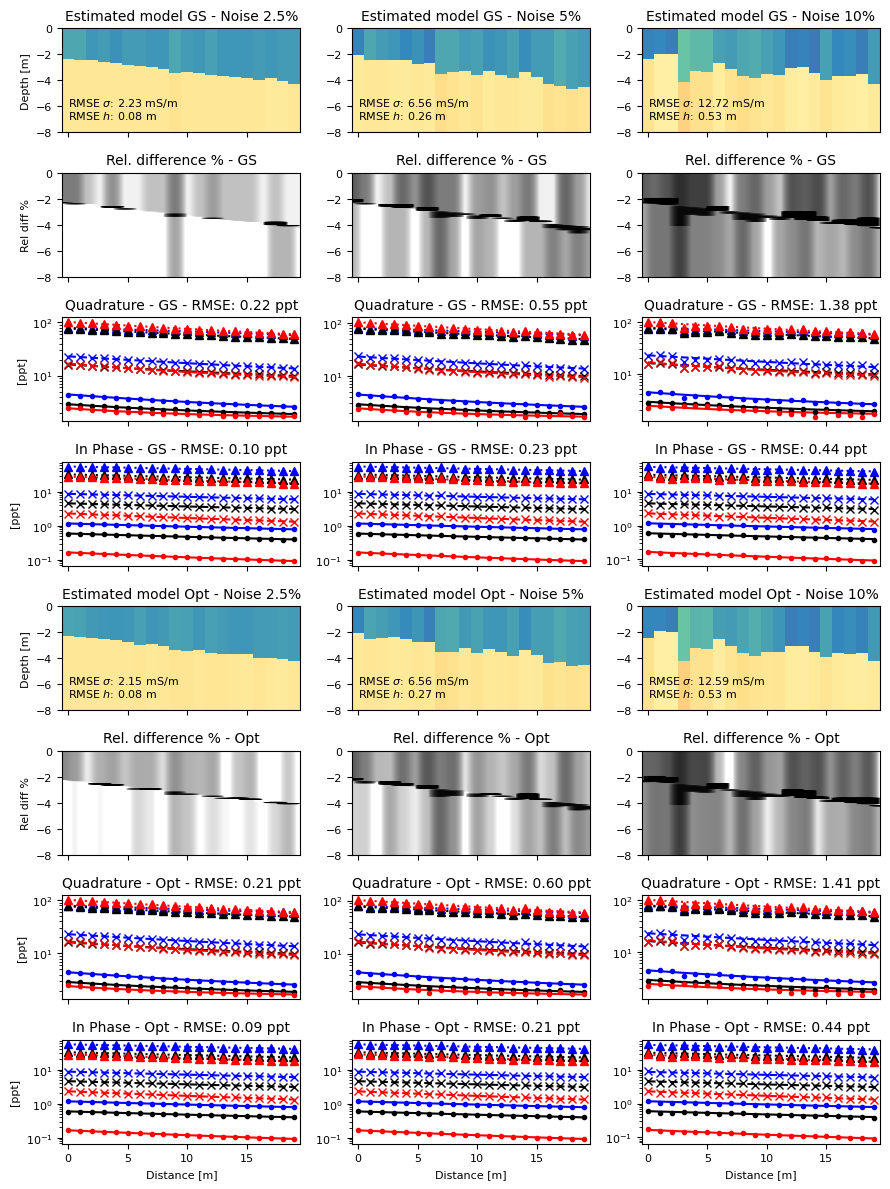

In [36]:
Plot_Noise(model_true_A1_1, model_GS_n2_A1_1, model_GS_n5_A1_1, model_GS_n10_A1_1,
           model_Opt_n2_A1_1, model_Opt_n5_A1_1, model_Opt_n10_A1_1 ,
          data_true_A1_1, 
           data_GS_n2_A1_1, data_GS_n5_A1_1, data_GS_n10_A1_1,
          data_Opt_n2_A1_1, data_Opt_n5_A1_1, data_Opt_n10_A1_1)
plt.savefig('figures/F1_noise.png', bbox_inches='tight')

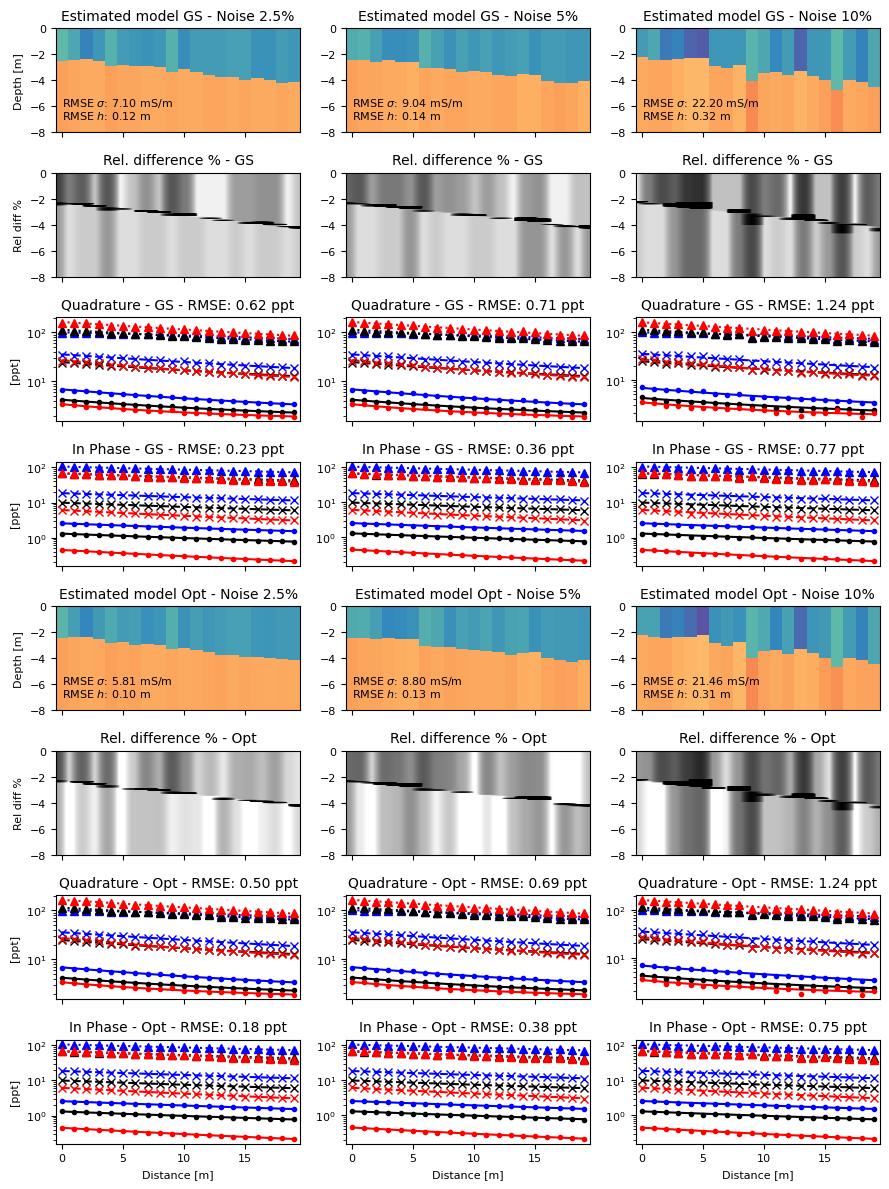

In [37]:
Plot_Noise(model_true_A1_2, model_GS_n2_A1_2, model_GS_n5_A1_2, model_GS_n10_A1_2,
           model_Opt_n2_A1_2, model_Opt_n5_A1_2, model_Opt_n10_A1_2,
          data_true_A1_2,
          data_GS_n2_A1_2, data_GS_n5_A1_2, data_GS_n10_A1_2,
          data_Opt_n2_A1_2, data_Opt_n5_A1_2, data_Opt_n10_A1_2)
plt.savefig('figures/F2_noise.png', bbox_inches='tight')

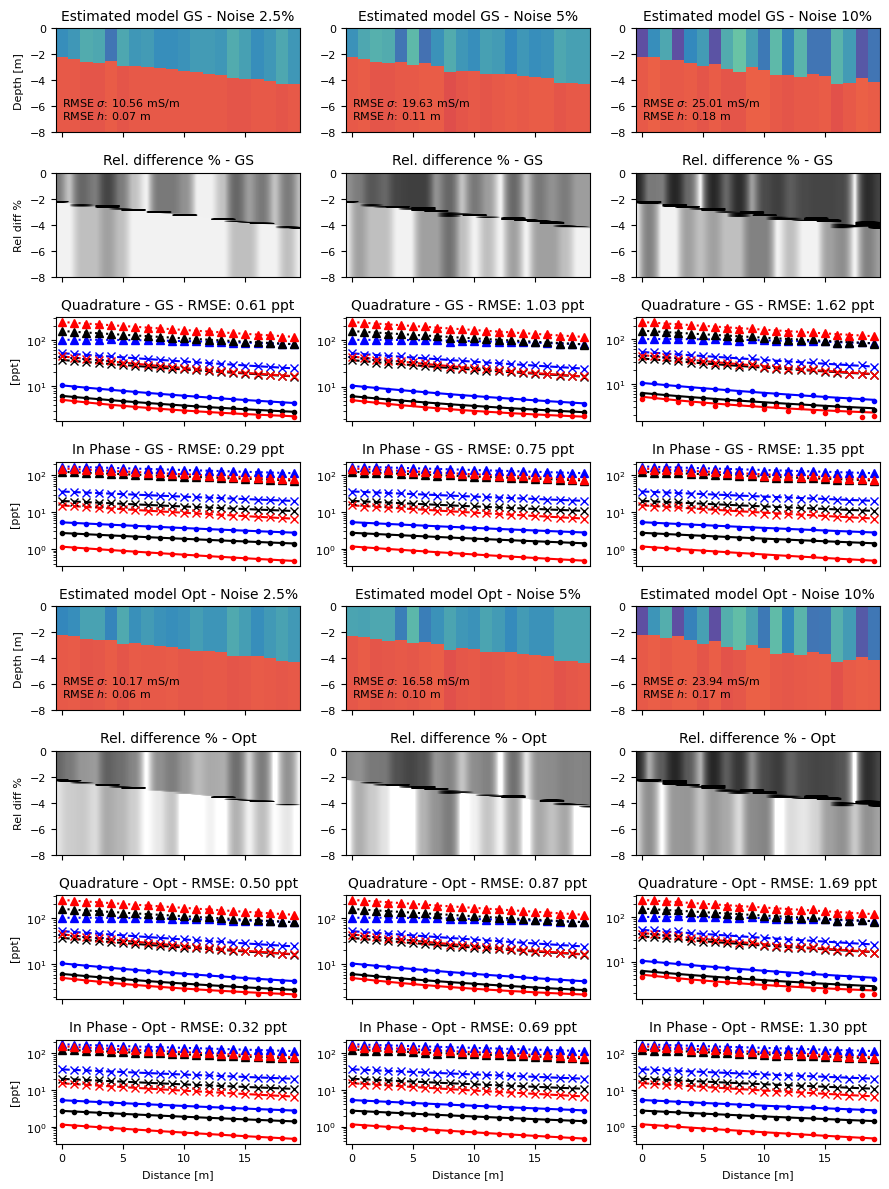

In [38]:
Plot_Noise(model_true_A1_3, model_GS_n2_A1_3, model_GS_n5_A1_3, model_GS_n10_A1_3,
           model_Opt_n2_A1_3, model_Opt_n5_A1_3, model_Opt_n10_A1_3,
          data_true_A1_3, 
          data_GS_n2_A1_3, data_GS_n5_A1_3, data_GS_n10_A1_3,
          data_Opt_n2_A1_3, data_Opt_n5_A1_3, data_Opt_n10_A1_3)
plt.savefig('figures/F3_noise.png', bbox_inches='tight')

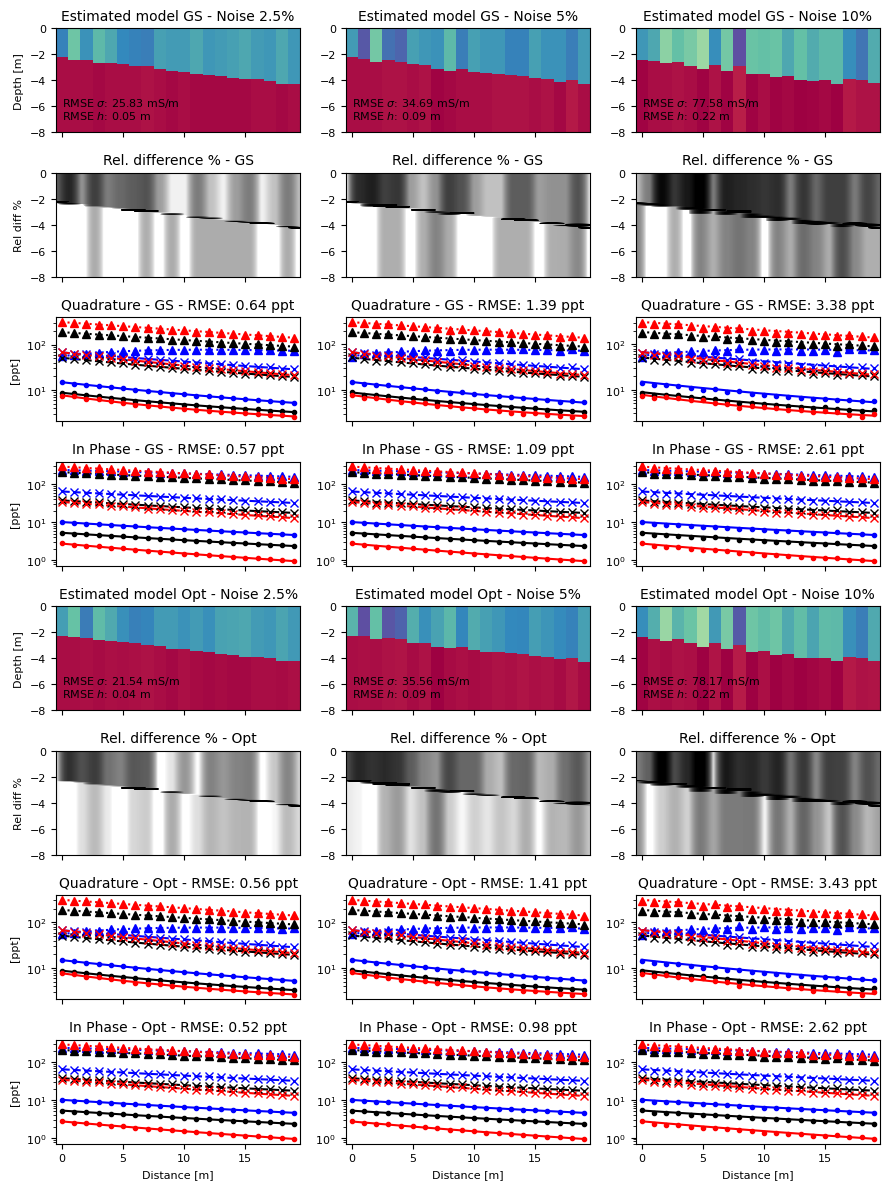

In [39]:
Plot_Noise(model_true_A1_4, model_GS_n2_A1_4, model_GS_n5_A1_4, model_GS_n10_A1_4,
           model_Opt_n2_A1_4, model_Opt_n5_A1_4, model_Opt_n10_A1_4,
          data_true_A1_4,
          data_GS_n2_A1_4, data_GS_n5_A1_4, data_GS_n10_A1_4,
          data_Opt_n2_A1_4, data_Opt_n5_A1_4, data_Opt_n10_A1_4)
plt.savefig('figures/F4_noise.png', bbox_inches='tight')